<a href="https://colab.research.google.com/github/foxtrotmike/svmtutorial/blob/master/svmtutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine Exercise
### Dr. Fayyaz Minhas

In this exercise, we will create a dummy (toy) dataset and try different types of support vector machines in sklearn. So let's begin with creating some data and writing a function that can show a scatter plot of the data as well as the classifier's decision surface and classification boundary. The function's use will become apparent when we take it for a spin later (or you can ignore it altogether!). We create data for two classes: The positive class is gaussian distributed random numbers with center at (1,1) and standard deviaton equal to 1.0 whereas the negative class is also gaussian distributed random numbers but with center at (-1,-1) and standard deviaton equal to 1.0. 

The data dimensions are (200, 2) (200,)


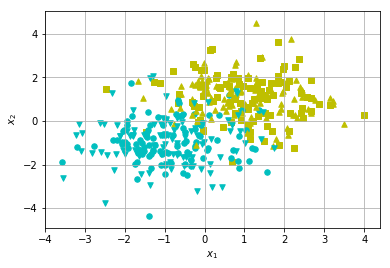

In [13]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plotit(X,Y=None,clf=None, markers = ('s','o'), hold = False, transform = None):
    """
    Just a function for showing a data scatter plot and classification boundary
    of a classifier clf
    """
    minx, maxx = np.min(X[:,0]), np.max(X[:,0])
    miny, maxy = np.min(X[:,1]), np.max(X[:,1])
    if clf is not None:
        npts = 100
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf.decision_function(t)
        z = np.reshape(z,(npts,npts))
        
        extent = [minx,maxx,miny,maxy]
        plt.imshow(z,vmin = -2, vmax = +2)    
        plt.contour(z,[-1,0,1],linewidths = [2],colors=('b','k','r'),extent=extent, label='f(x)=0')
        plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.axis([minx,maxx,miny,maxy])   
    if Y is not None:
        plt.scatter(X[Y==1,0],X[Y==1,1],marker = markers[0], c = 'y', s = 30)
        plt.scatter(X[Y==-1,0],X[Y==-1,1],marker = markers[1],c = 'c', s = 30)
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')        
         
    else:
        plt.scatter(X[:,0],X[:,1],marker = '.', c = 'k', s = 5)
    if not hold:
        plt.grid()
        plt.show()
#Let's generate some training data

Xp = 1+np.random.randn(100,2)
Xn = -1-np.random.randn(100,2)
X = np.vstack((Xp,Xn))
Y = np.array([1]*Xp.shape[0]+[-1]*Xn.shape[0])
print 'The data dimensions are',X.shape, Y.shape

plotit(X,Y, hold = True)
#Let's generate some test data

Xpt = 1+np.random.randn(100,2)
Xnt = -1-np.random.randn(100,2)
Xt = np.vstack((Xpt,Xnt))
Yt = np.array([1]*Xpt.shape[0]+[-1]*Xnt.shape[0])

plotit(Xt, Yt, markers = ('^','v'))

The above plot shows the scatter plot of our training and test data. The two classes are indicated by the color and marker differences. The training data is shown in circles and squares whereas the test data classes are shown in up or down triangles.


## Linear Support Vector Classifier
Let's try making a simple linear classifier. This can be done using sklear.svm (http://scikit-learn.org/stable/modules/svm.html). We first creat an object of class LinearSVC and then fit it to the data using .fit function. We can predict class labels using clf.predict and obtain decision function scores using clf.decision_function. We evaluate training and test accuracy as well. We then get the weight vector and bias of the trained classifier and calculate its norm.

Test Accuracy 0.9
Train Accuracy 0.915
[[0.50521323 0.59666478]] [-0.04962944]
||w|| =  0.7818243215454815


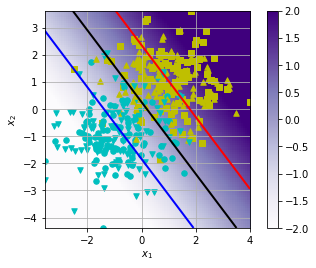

In [14]:
from sklearn.svm import LinearSVC


clf = LinearSVC(C = 1.0, class_weight = 'balanced')

clf.fit(X,Y)


Yp = clf.predict(Xt)
Zp = clf.decision_function(Xt)

print "Test Accuracy", np.mean(Yp==Yt)
print "Train Accuracy", np.mean(clf.predict(X)==Y)

w = clf.coef_
b = clf.intercept_
#sv = clf.support_vectors_
print w,b
print "||w|| = ",np.linalg.norm(w)

plotit(X,Y, clf, hold = True)
plotit(Xt,Yt, markers = ('^','v'))

The above plot shows the scatter plot together with the classification boundary (black line) as well as the $f(x)=+1$ and $f(x)=-1$ lines in blue and red,respectively. These lines have been drawn to show the margin of the classifier. We get a good decision boundary for this data with the linear SVM.

## Questions
Here are some questions.

### Find the support vectors.

### Find the training examples that are misclassified. Are all those examples support vectors?

### What is the effect of value of C on the classification boundary, margin and the norm of the weight vector? You can understand this by changing the value of C and re-running the code.

### How to choose the value of C?

## Linear SVM using SVC

Let's try the linear classifier using SVC. This is another (more flexible) way of making SVM and it solves the SVM problem in the dual instead of the primal as in the LinearSVC. It also directly tells us which points are support vectors and we plot them overlayed on the original data as black dots. We can also see, how many support vectors we get.

Test Accuracy 0.9
Train Accuracy 0.91
[[1.05344233 1.22787317]] [8.35472318e-05]
Number of support vectors: 48


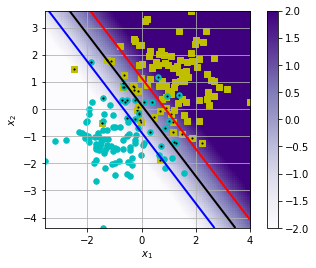

In [15]:
from sklearn.svm import SVC

clf = SVC(C = 1.0, kernel = 'linear', class_weight = 'balanced')

clf.fit(X,Y)

Yp = clf.predict(Xt)
Zp = clf.decision_function(Xt)

print "Test Accuracy", np.mean(Yp==Yt)
print "Train Accuracy", np.mean(clf.predict(X)==Y)

w = clf.coef_
b = clf.intercept_

sv = clf.support_vectors_
#alphas = clf.dual_coef_
print w,b
print 'Number of support vectors:', sv.shape[0]
plotit(X,Y, clf, hold = True)
plotit(sv)
#plotit(Xt,Yt, markers = ('^','v'), hold = True)


## Polynomial Kernel SVM

Let's try the polynomial kernel. The polynomial kernel has the form $k(\mathbf a, \mathbf b) = ( \mathbf a^T \mathbf b + c)^p$. The degree $p$ and the coefficient $c$ can be passed directly to the SVC as follows.



Test Accuracy 0.885
Train Accuracy 0.92
Number of support vectors: 47


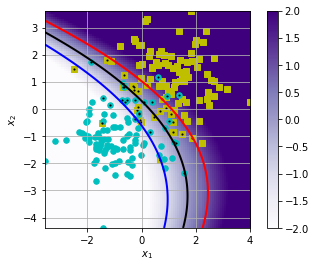

In [25]:
from sklearn.svm import SVC

clf = SVC(C = 1, kernel = 'poly', degree = 2,  class_weight = 'balanced', coef0 = 1.0)

clf.fit(X,Y)

Yp = clf.predict(Xt)
Zp = clf.decision_function(Xt)
sv = clf.support_vectors_

print "Test Accuracy", np.mean(Yp==Yt)
print "Train Accuracy", np.mean(clf.predict(X)==Y)
print 'Number of support vectors:', sv.shape[0]

plotit(X,Y, clf, hold = True)
plotit(sv)

Here are some questions.
### What is the effect of degree on test and train accuracies? Why?
### What is the effect of C and degree on the number of support vectors?
### Can you, for degree = 3, change C so that you can get a linear discriminant boundary?
### How do we select degree?

## RBF Kernel SVM

Here is the code for using Radial Basis Functions (RBF) $K(\mathbf {a},\mathbf {b}) = exp(-\gamma||\mathbf {a}-\mathbf {b}||^2)$. 

Test Accuracy 0.885
Train Accuracy 0.92
Number of support vectors: 79


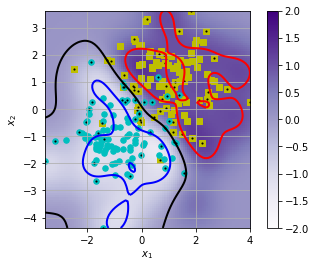

In [26]:
from sklearn.svm import SVC

clf = SVC(C = 1.0, kernel = 'rbf', gamma = 1.0,  class_weight = 'balanced', cache_size = 2000)

clf.fit(X,Y)

Yp = clf.predict(Xt)
Zp = clf.decision_function(Xt)
sv = clf.support_vectors_

print "Test Accuracy", np.mean(Yp==Yt)
print "Train Accuracy", np.mean(clf.predict(X)==Y)
print 'Number of support vectors:', sv.shape[0]

plotit(X,Y, clf, hold = True)
plotit(sv)

Here are some questions.

### What is the role of $\gamma$ parameter? How does it change the boundary, test and train accuracies?
### How do the number of support vectors change with change in $\gamma$ and $C$?
### What value of $\gamma$ will lead to a linear boundary?
### What happens to the margin and the decision boundary when you simultanseously increase $\gamma$ and decrease $C$?


## A Deeper Look at Kernels
In order to understand kernels better, we take the classical XOR classification problem which is not linearly separable and try to solve it using transformations and then see how kernels replace transformations.

Let's take a simple linear SVM to verify that the linear SVM does not solve the XOR classification problem in the original feature space.


Train Accuracy 0.25


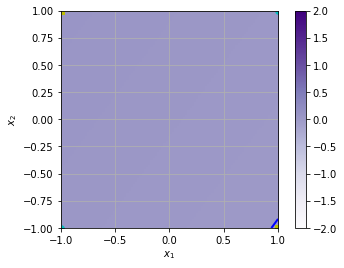

In [27]:

xor = np.array([[-1,-1],[-1,1],[1,-1],[1,1]], dtype = np.float)
yor = np.array([-1,1,1,-1])

clf = LinearSVC(C = 100)

clf.fit(xor,yor)

print "Train Accuracy", np.mean(clf.predict(xor)==yor)

plotit(xor,yor, clf)



Just as we had expected, the Linear SVM fails here. We can try transforming the input data into another feature space using the mapping: $\phi(x) = [x_0,x_1,\sqrt 2 
x_0x_1]^T$, which we had discussed in the class and shown that it makes the XOR problem linearly separable. The fu nction transform simply transforms every row of a given 2D numpy array by applying this transformation. As expected, the Linear SVM is now able to classify this.

Train Accuracy 1.0


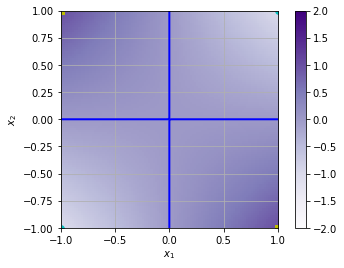

In [28]:
def transform(X):
    return np.array([[x[0],x[1],np.sqrt(2)*x[0]*x[1]] for x in np.atleast_2d(X)])
                    
txor = transform(xor)
                    
clf = LinearSVC(C = 100)
clf.fit(txor,yor)

print "Train Accuracy", np.mean(clf.predict(txor)==yor)
plotit(txor,yor, clf, transform = transform)

We can do another transformation $\phi(x) = (x_0-x_1)^2$, which does not increase the dimensionality of the data but still makes the problem linearly separable.

### Can you think of other transformations that would solve the XOR problem and test them using this code?

Train Accuracy 1.0


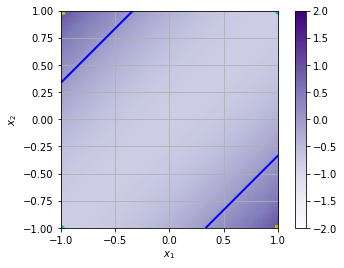

In [29]:
def transform(X):    
    return np.array([[(x[0]-x[1])**2] for x in np.atleast_2d(X)])
                    
txor = transform(xor)
                    
clf = LinearSVC(C = 1.0)
clf.fit(txor,yor)

print "Train Accuracy", np.mean(clf.predict(txor)==yor)
plotit(xor,yor, clf, transform = transform)

We had discussed in the class that the SVM dual problem contains only the dot product ${\mathbf x^i}^T{\mathbf x^j}$ which is a scalar and we can replace it with the dot product of the transformed features ${\mathbf {\phi (x^i)}}^T{\mathbf {\phi(x^j)}}$. This can be done in two ways -- by taking the dot product in the transformed space or by defining a kernel function directly. Below we try both of these and see that all of these ways produce the same output.

Kernel Matrix
[[ 0.  0.  0.  0.]
 [ 0. 16. 16.  0.]
 [ 0. 16. 16.  0.]
 [ 0.  0.  0.  0.]]
Train Accuracy 1.0


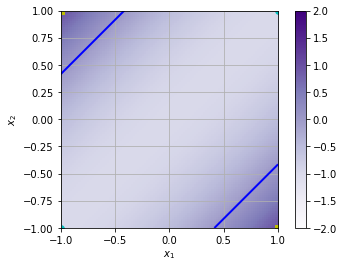

In [30]:
def myKernel(A,B):
    return np.dot(transform(A),transform(B).T)
                    
print "Kernel Matrix\n", myKernel(xor,xor)
   
clf = SVC(C = 1.0, kernel = myKernel)
clf.fit(xor,yor)

print "Train Accuracy", np.mean(clf.predict(xor)==yor)
plotit(xor,yor, clf)

Here is the kernel function implementation. Notice that we know longer need an explicit transformation -- just a mathematical function. We also show the kernel matrix!

Kernel Matrix
[[ 0.  0.  0.  0.]
 [ 0. 16. 16.  0.]
 [ 0. 16. 16.  0.]
 [ 0.  0.  0.  0.]]
Train Accuracy 1.0


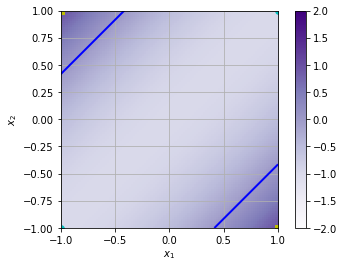

In [31]:
def myKernel(A,B ):
    K = np.zeros((A.shape[0],B.shape[0]))
    for i,a in enumerate(A):
        for j,b in enumerate(B):
            K[i,j] = ((a[0]-a[1])**2)*((b[0]-b[1])**2)
    # Can be done faster in vector math
    return K

print "Kernel Matrix\n", myKernel(xor,xor)

clf = SVC(C = 1.0, kernel = myKernel)
clf.fit(xor,yor)

print "Train Accuracy", np.mean(clf.predict(xor)==yor)
plotit(xor,yor, clf)

We can try other kernels as well! For example, here is a manual implementation of the RBF kernel -- notice that it doesn't have any transformation defined in it!

Kernel Matrix
[[1.00000000e+00 1.83156389e-02 1.83156389e-02 3.35462628e-04]
 [1.83156389e-02 1.00000000e+00 3.35462628e-04 1.83156389e-02]
 [1.83156389e-02 3.35462628e-04 1.00000000e+00 1.83156389e-02]
 [3.35462628e-04 1.83156389e-02 1.83156389e-02 1.00000000e+00]]
Train Accuracy 1.0


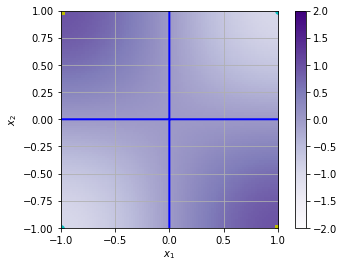

In [32]:
def myKernel(A,B ):
    gamma = 1.0
    K = np.zeros((A.shape[0],B.shape[0]))
    for i,a in enumerate(A):
        for j,b in enumerate(B):
            K[i,j] = np.exp(-gamma*np.linalg.norm(a-b)**2)
    # Can be done faster in vector math
    return K

print "Kernel Matrix\n", myKernel(xor,xor)

clf = SVC(C = 1.0, kernel = myKernel)
clf.fit(xor,yor)

print "Train Accuracy", np.mean(clf.predict(xor)==yor)
plotit(xor,yor, clf)

Lastly, we demonstrate that the SVM doesn't need feature representations as well if it is given a kernel! 

In [33]:
K = myKernel(xor,xor)

print "Kernel Matrix\n", 

clf = SVC(C = 1.0, kernel = 'precomputed')
clf.fit(K,yor)

Xtest = xor

print "Train Accuracy", np.mean(clf.predict(myKernel(Xtest,xor))==yor)

Kernel Matrix
Train Accuracy 1.0
